# import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Data

In [2]:
amazon= pd.read_csv('/Users/t-2024-m0196/my-repo/Git/Git/실전프로젝트/amazon_이상치처리.csv')

In [3]:
# 날짜 필터링 

start_date= '2017-01-01'
end_date= '2018-02-28'

amazon['DateKey'] = pd.to_datetime(amazon['DateKey'], format= '%m/%d/%Y')
amazon = amazon[(amazon['DateKey'] >=start_date) & (amazon['DateKey'] <= end_date)]
# sorted(amazon['DateKey'].unique())

amazon.info()
amazon.head(3)


<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 29931 to 64222
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           34292 non-null  int64         
 1   DateKey                           34292 non-null  datetime64[ns]
 2   Discount Amount                   34292 non-null  float64       
 3   Invoice Date                      34292 non-null  object        
 4   Invoice Number                    34292 non-null  int64         
 5   Item                              34292 non-null  object        
 6   Line Number                       34292 non-null  int64         
 7   List Price                        34292 non-null  float64       
 8   Order Number                      34292 non-null  int64         
 9   Sales Amount                      34292 non-null  float64       
 10  Sales Amount Based on List Price  34292 non-nul

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
29931,10019066,2018-02-28,200.88,2018/02/28,224543,Ebony Squash,131000,144.13,316401,231.51,432.39,157.77,73.74,77.170000,3,108,EA
29932,10026291,2018-02-28,320.38,2018/02/28,224549,High Top Walnuts,12000,51.88,317431,302.18,622.56,125.91,176.27,25.181667,12,143,EA
29933,10019066,2018-02-28,30.35,2018/02/28,224552,Landslide Creamy Peanut Butter,22000,201.69,318048,1381.48,1411.83,237.78,1143.70,197.354286,7,108,SE


In [4]:
temp= amazon['Custkey'].value_counts()
print(len(temp[temp > 1]))
# 34292 개의 Custkey 데이터 중에 중복구매한 사용자 수 482
print(len(temp[temp==1]))
# 1인 사람 41개
print(len(temp))

482
41
523


In [5]:
print(amazon.shape)
amazon.isna().sum()

(34292, 17)


Custkey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64

In [6]:
print('총 매출: ', round(amazon['Sales Amount'].sum(), 2))
print('총 할인 금액: ', round(amazon['Discount Amount'].sum(), 2))
print('총 주문 수: ', round(amazon['Order Number'].sum(), 2))

총 매출:  92182566.89
총 할인 금액:  65335824.33
총 주문 수:  7729741566


# 고객별 Sales Amount

In [7]:
cust_m= amazon.groupby('Custkey')['Sales Amount'].sum().reset_index()

cust_m.sort_values(by= 'Sales Amount', ascending= False)

,Custkey,Sales Amount
337,10021485,10949474.37
426,10025024,7942250.36
437,10025052,5419724.38
483,10025919,3250786.04
434,10025039,2694738.60
...,...,...
397,10023785,227.13
485,10026009,224.55
267,10019812,221.04
421,10024924,216.33


In [8]:
# R, F

cust_rf = amazon.groupby('Custkey').agg(
    Last_Purchase=('Invoice Date', 'max')
    , Frequency=('Order Number', 'nunique') # invoice number?
).reset_index()

cust_rf

,Custkey,Last_Purchase,Frequency
0,10000453,2017/01/06,2
1,10000455,2017/11/04,12
2,10000456,2017/12/04,12
3,10000457,2017/12/01,3
4,10000458,2018/02/03,2
...,...,...,...
518,10027381,2018/02/21,20
519,10027560,2017/12/26,15
520,10027572,2018/02/06,8
521,10027575,2018/01/02,1


# RFM 523개

In [9]:
cust_rfm= cust_rf.merge(cust_m, on= 'Custkey')

cust_rfm= cust_rfm.rename(columns= {'Last_Purchase': 'Recency',
                          'Sales Amount': 'Monetary'})

In [10]:
cust_rfm.info()
cust_rfm.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Custkey    523 non-null    int64  
 1   Recency    523 non-null    object 
 2   Frequency  523 non-null    int64  
 3   Monetary   523 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 16.5+ KB


,Custkey,Recency,Frequency,Monetary
0,10000453,2017/01/06,2,8422.15
1,10000455,2017/11/04,12,22403.73
2,10000456,2017/12/04,12,104994.68


In [11]:
# sorted(cust_rfm['Recency'].unique())
sorted(cust_rfm['Monetary'].unique())

# 소수점 X
cust_rfm['Monetary']= round(cust_rfm['Monetary'])

# 데이터타입 int로 변경
cust_rfm['Monetary']= cust_rfm['Monetary'].astype(int)

In [12]:
# recency datetime으로 변환
cust_rfm['Recency']= pd.to_datetime(cust_rfm['Recency'])

# 2018 03 01을 현재날짜로 설정
cust_rfm['Recency']= dt.datetime(2018, 3, 1) - cust_rfm['Recency']
# 01로 하니까 오류남

# 2018 03 01을 현재날짜로 간주하고 가장 최근의 주문 일자를 뺌
cust_rfm['Recency']= cust_rfm['Recency'].apply(lambda x:x.days+1)

cust_rfm

,Custkey,Recency,Frequency,Monetary
0,10000453,420,2,8422
1,10000455,118,12,22404
2,10000456,88,12,104995
3,10000457,91,3,14285
4,10000458,27,2,2090
...,...,...,...,...
518,10027381,9,20,58223
519,10027560,66,15,48483
520,10027572,24,8,26456
521,10027575,59,1,722


,Custkey,Recency,Frequency,Monetary
count,5.230000e+02,523.000000,523.000000,5.230000e+02
mean,1.001700e+07,93.692161,17.502868,1.762573e+05
std,7.747002e+03,120.265921,33.632871,7.101992e+05
min,1.000045e+07,2.000000,1.000000,2.080000e+02
25%,1.001097e+07,12.000000,3.000000,5.600000e+03
50%,1.001947e+07,60.000000,8.000000,2.675300e+04
75%,1.002376e+07,91.000000,19.000000,1.001970e+05
max,1.002758e+07,423.000000,458.000000,1.094947e+07


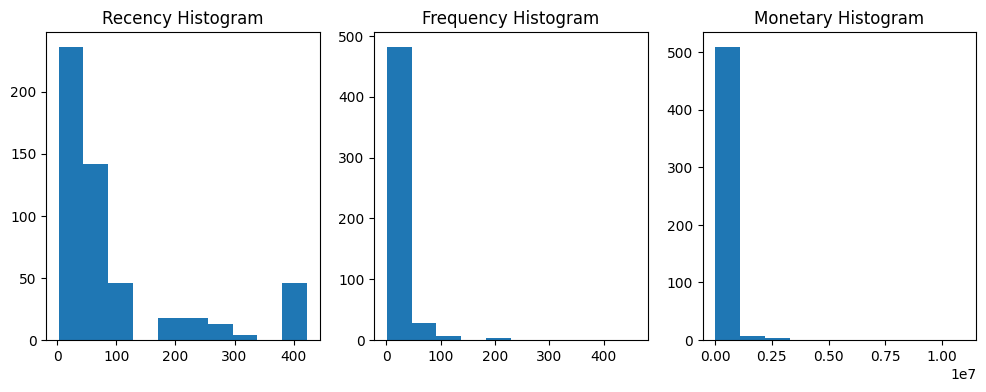

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

# plt.ticklabel_format(style = 'plain')
ax1.set_title('Recency Histogram')
ax1.hist(cust_rfm['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_rfm['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_rfm['Monetary'])

# 모두 왜곡된 값 분포

In [14]:
cust_rfm.describe()

,Custkey,Recency,Frequency,Monetary
count,5.230000e+02,523.000000,523.000000,5.230000e+02
mean,1.001700e+07,93.692161,17.502868,1.762573e+05
std,7.747002e+03,120.265921,33.632871,7.101992e+05
min,1.000045e+07,2.000000,1.000000,2.080000e+02
25%,1.001097e+07,12.000000,3.000000,5.600000e+03
50%,1.001947e+07,60.000000,8.000000,2.675300e+04
75%,1.002376e+07,91.000000,19.000000,1.001970e+05
max,1.002758e+07,423.000000,458.000000,1.094947e+07


- recency: 마지막 구매일이 최근(2018 03 01)인 사람들이 많음.
- frequency: 최대값은 458이지만 중위값은 8.
    - 5분기 동안 8번 구매?
    - 식료품치고는 충성고객이 별로 없다